# ArangoDB NetworkX Adapter Getting Started Guide  

<a href="https://colab.research.google.com/github/arangoml/networkx-adapter/blob/master/examples/ArangoDB_NetworkxAdapter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![networkX](https://github.com/arangoml/networkx-adapter/blob/master/examples/assets/logos/networkx_logo.svg?raw=1) 
![arangodb](https://github.com/arangoml/networkx-adapter/blob/master/examples/assets/logos/ArangoDB_logo.png?raw=1) 

Version: 1.0.0

In this Notebook we learn how to export Graphs from [ArangoDB](https://www.arangodb.com/), a multi-model Graph Database into [NetworkX](https://networkx.github.io/), the swiss army knife for graph analysis ion python.

# Setup

In [ ]:
%%capture
!git clone -b oasis_connector --single-branch https://github.com/arangodb/interactive_tutorials.git
!git clone -b 1.0.0 --single-branch https://github.com/arangoml/networkx-adapter.git
!rsync -av networkx-adapter/examples/ ./ --exclude=.git
!rsync -av interactive_tutorials/ ./ --exclude=.git
!pip3 install adbnx_adapter=1.0.0
!pip3 install matplotlib
!pip3 install pyArango

In [ ]:
import json
import oasis
import networkx as nx
import matplotlib.pyplot as plt


from adbnx_adapter.arangoDB_networkx_adapter import ArangoDB_Networkx_Adapter

# Create a Temporary ArangoDB Instance

In [ ]:
# Request temporary instance from the managed ArangoDB Cloud Oasis.
con = oasis.getTempCredentials()

# Connect to the db via the python-arango driver
python_arango_db_driver = oasis.connect_python_arango(con)

# (Optional) Connect to the db via the pyArango driver
# pyarango_db_driver = oasis.connect(con)[con['dbName']]

print()
print("https://{}:{}".format(con["hostname"], con["port"]))
print("Username: " + con["username"])
print("Password: " + con["password"])
print("Database: " + con["dbName"])

Requesting new temp credentials.
Temp database ready to use.

https://tutorials.arangodb.cloud:8529
Username: TUTefotfw4ufjjayeu9otb6zv
Password: TUTu1tmbw2f1mpbbd17ixskd
Database: TUT1qx8lj2wdockelqg6j89ol


Feel free to use to above URL to checkout the UI!

# Data Import

We will use an Fraud Detection example graph, explained in more detail in this [interactive notebook](https://colab.research.google.com/github/joerg84/Graph_Powered_ML_Workshop/blob/master/Fraud_Detection.ipynb).

*Note the included arangorestore will only work on Linux system, if you want to run this notebook on a different OS please consider using the appropriate arangorestore from the [Download area](https://www.arangodb.com/download-major/).*

In [ ]:
!chmod -R 755 ./tools
!./tools/arangorestore -c none --server.endpoint http+ssl://{con["hostname"]}:{con["port"]} --server.username {con["username"]} --server.database {con["dbName"]} --server.password {con["password"]} --default-replication-factor 3  --input-directory "data/fraud_dump"
!./tools/arangorestore -c none --server.endpoint http+ssl://{con["hostname"]}:{con["port"]} --server.username {con["username"]} --server.database {con["dbName"]} --server.password {con["password"]} --default-replication-factor 3  --input-directory "data/imdb_dump"

2021-11-05T14:15:21Z [186] INFO [05c30] {restore} Connected to ArangoDB 'http+ssl://tutorials.arangodb.cloud:8529'
2021-11-05T14:15:21Z [186] INFO [abeb4] {restore} Database name in source dump is 'fraud-detection'
2021-11-05T14:15:21Z [186] INFO [9b414] {restore} # Re-creating document collection 'account'...
2021-11-05T14:15:21Z [186] INFO [9b414] {restore} # Re-creating document collection 'bank'...
2021-11-05T14:15:22Z [186] INFO [9b414] {restore} # Re-creating document collection 'branch'...
2021-11-05T14:15:22Z [186] INFO [9b414] {restore} # Re-creating document collection 'Class'...
2021-11-05T14:15:22Z [186] INFO [9b414] {restore} # Re-creating document collection 'customer'...
2021-11-05T14:15:23Z [186] INFO [9b414] {restore} # Re-creating edge collection 'accountHolder'...
2021-11-05T14:15:23Z [186] INFO [9b414] {restore} # Re-creating edge collection 'Relationship'...
2021-11-05T14:15:23Z [186] INFO [9b414] {restore} # Re-creating edge collection 'transaction'...
2021-11-05T

# Create Graph

The graph we will be using in the following looks as follows:

![networkX](https://github.com/arangoml/networkx-adapter/blob/master/examples/assets/fraud_graph.jpeg?raw=1) 

In [ ]:
edge_definitions = [
    {
        "edge_collection": "accountHolder",
        "from_vertex_collections": ["customer"],
        "to_vertex_collections": ["account"],
    },
    {
        "edge_collection": "transaction",
        "from_vertex_collections": ["account"],
        "to_vertex_collections": ["account"],
    },
]

fraud_graph = python_arango_db_driver.create_graph("fraud-detection", edge_definitions=edge_definitions)

print("Graph Setup done.")

Graph Setup done.


Feel free to visit the ArangoDB UI using the above link and login data and check the Graph!

# Create Adapter

Connect the ArangoDB_Networkx_Adapter to our temp ArangoDB cluster:

In [ ]:
adbnx_adapter = ArangoDB_Networkx_Adapter(con)

# ArangoDB to NetworkX



## Via ArangoDB Attributes

NetworkX: FraudDetection created
[('account/10000011', {'Balance': 5331, 'account_type': 'checking', 'customer_id': 10000009, 'rank': 0.0021126761566847563, '_id': 'account/10000011'}), ('account/10000016', {'Balance': 7630, 'account_type': 'checking', 'customer_id': 10000004, 'rank': 0.003122549969702959, '_id': 'account/10000016'}), ('account/10000003', {'Balance': 1433, 'account_type': 'checking', 'customer_id': 10000004, 'rank': 0.00524971354752779, '_id': 'account/10000003'}), ('account/10000029', {'Balance': 2201, 'account_type': 'checking', 'customer_id': 10000010, 'rank': 0.0021126761566847563, '_id': 'account/10000029'}), ('account/10000005', {'Balance': 4837, 'account_type': 'checking', 'customer_id': 10000002, 'rank': 0.004550427198410034, '_id': 'account/10000005'}), ('account/10000032', {'Balance': 5817, 'account_type': 'checking', 'customer_id': 10000011, 'rank': 0.0036875137593597174, '_id': 'account/10000032'}), ('account/10000039', {'Balance': 1689, 'account_type': 'ch

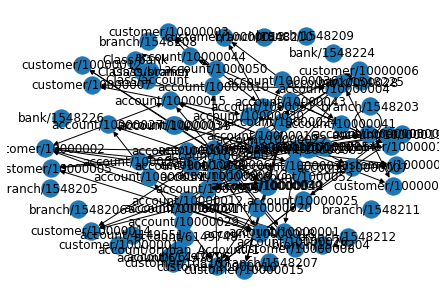

In [ ]:
# Define attributes
fraud_detection_attributes = {
    "vertexCollections": {
        "account": {"Balance", "account_type", "customer_id", "rank"},
        "bank": {"Country", "Id", "bank_id", "bank_name"},
        "branch": {"City", "Country", "Id", "bank_id", "branch_id", "branch_name"},
        "Class": {"concrete", "label", "name"},
        "customer": {"Name", "Sex", "Ssn", "rank"},
    },
    "edgeCollections": {
        "accountHolder": {"_from", "_to"},
        "Relationship": {"_from", "_to", "label", "name", "relationshipType"},
        "transaction": {"_from", "_to"},
    },
}

# Create NetworkX Graph from attributes
nx_g = adbnx_adapter.create_networkx_graph('FraudDetection',  fraud_detection_attributes)

# You can also provide valid Python-Arango AQL query options to the command above, like such:
# nx_g = adbnx_adapter.create_networkx_graph(graph_name = 'FraudDetection',  fraud_detection_attributes, ttl=1000, stream=True)
# See more here: https://docs.python-arango.com/en/main/specs.html#arango.aql.AQL.execute

# Show graph data
print(nx_g.nodes(data=True))
print(nx_g.edges(data=True))
nx.draw(nx_g, with_labels=True)

## Via ArangoDB Collections

NetworkX: fraud-detection created
[('Class/bank', {'_key': 'bank', '_id': 'Class/bank', '_rev': '_dN_yPEO---', 'concrete': True, 'name': 'Bank', 'label': 'Bank'}), ('Class/branch', {'_key': 'branch', '_id': 'Class/branch', '_rev': '_dN_yPEO--_', 'concrete': True, 'name': 'Branch', 'label': 'Branch Bank'}), ('Class/account', {'_key': 'account', '_id': 'Class/account', '_rev': '_dN_yPEO--A', 'concrete': True, 'name': 'Account', 'label': 'Account'}), ('Class/customer', {'_key': 'customer', '_id': 'Class/customer', '_rev': '_dN_yPEO--B', 'concrete': True, 'name': 'Customer', 'label': 'Customer'}), ('bank/1548224', {'_key': '1548224', '_id': 'bank/1548224', '_rev': '_dN_yPBO---', 'Id': 10000000001, 'bank_id': 10000000001, 'bank_name': 'Bank One', 'Country': 'US'}), ('bank/1548226', {'_key': '1548226', '_id': 'bank/1548226', '_rev': '_dN_yPBO--_', 'Id': 10000000003, 'bank_id': 10000000003, 'bank_name': 'Bank Three', 'Country': 'US'}), ('bank/1548225', {'_key': '1548225', '_id': 'bank/1548225

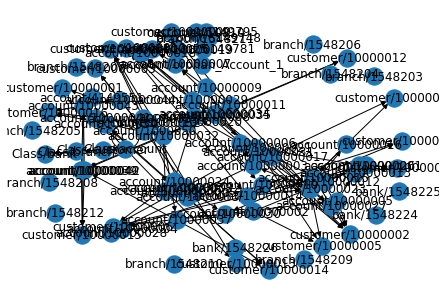

In [ ]:
# Define collection
vertex_collections = {"account", "bank", "branch", "Class", "customer"}
edge_collections = {"accountHolder", "Relationship", "transaction"}

# Create NetworkX graph from ArangoDB collections
nx_g = adbnx_adapter.create_networkx_graph_from_arangodb_collections("fraud-detection", vertex_collections, edge_collections)

# You can also provide valid Python-Arango AQL query options to the command above, like such:
# nx_g = adbnx_adapter.create_networkx_graph_from_arangodb_collections("fraud-detection", vertex_collections, edge_collections, ttl=1000, stream=True)
# See more here: https://docs.python-arango.com/en/main/specs.html#arango.aql.AQL.execute

# Show graph data
print(nx_g.nodes(data=True))
print(nx_g.edges(data=True))
nx.draw(nx_g, with_labels=True)

## Via ArangoDB Graph

NetworkX: fraud-detection created
[('account/10000011', {'_key': '10000011', '_id': 'account/10000011', '_rev': '_dN_yPEK---', 'Balance': 5331, 'Status': 'active', 'account_opening_date': '2018-3-13', 'account_type': 'checking', 'bank_id': 10000000001, 'branch_id': 10001, 'customer_id': 10000009, 'rank': 0.0021126761566847563}), ('account/10000016', {'_key': '10000016', '_id': 'account/10000016', '_rev': '_dN_yPEK--_', 'Balance': 7630, 'Status': 'active', 'account_opening_date': '2018-10-15', 'account_type': 'checking', 'bank_id': 10000000002, 'branch_id': 10005, 'customer_id': 10000004, 'rank': 0.003122549969702959}), ('account/10000003', {'_key': '10000003', '_id': 'account/10000003', '_rev': '_dN_yPEK--A', 'Balance': 1433, 'Status': 'active', 'account_opening_date': '2017-10-24', 'account_type': 'checking', 'bank_id': 10000000002, 'branch_id': 10006, 'customer_id': 10000004, 'rank': 0.00524971354752779}), ('account/10000029', {'_key': '10000029', '_id': 'account/10000029', '_rev': '

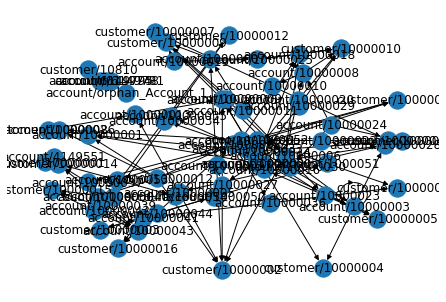

In [ ]:
# Define graph name
graph_name = "fraud-detection"

# Create NetworkX graph from ArangoDB graph
nx_g = adbnx_adapter.create_networkx_graph_from_arangodb_graph(graph_name)

# You can also provide valid Python-Arango AQL query options to the command above, like such:
# nx_g = adbnx_adapter.create_networkx_graph_from_arangodb_collections(graph_name, ttl=1000, stream=True)
# See more here: https://docs.python-arango.com/en/main/specs.html#arango.aql.AQL.execute

# Show graph data
print(nx_g.nodes(data=True))
print(nx_g.edges(data=True))
nx.draw(nx_g, with_labels=True)

## Via ArangoDB Attributes with a customized adapter

In [ ]:
# Introduce the new adapter class
class IMDB_ArangoDB_Networkx_Adapter(ArangoDB_Networkx_Adapter):
    # We re-define how vertex pre-insertion should be treated, specifically for the IMDB dataset.
    def _prepare_nx_node(self, node: dict, col: str, atribs: set):
        """
        Given access to an ArangoDB vertex, you can modify it before it gets inserted,
        and/or derive a custom node id for networkx to use.
        """
        node["bipartite"] = 0 if col == "Users" else 1  # The new change
        return node["_id"]  # This is standard

    # We're not interested in re-defining pre-insertion handling for edges, so we leave it be
    # def _prepare_nx_edge(self, edge: dict, col: str, atribs: set):
    #     return super()._prepare_nx_edge(edge, col, atribs)

# Instantiate the adapter
imdb_adbnx_adapter = IMDB_ArangoDB_Networkx_Adapter(con)

# Define attributes
imdb_attributes = {
    "vertexCollections": {"Users": {}, "Movies": {}},
    "edgeCollections": {"Ratings": {"_from", "_to", "ratings"}},
}

# Create NetworkX Graph from attributes using the custom IMDB_ArangoDB_Networx_Adapter
nx_g = imdb_adbnx_adapter.create_networkx_graph("IMDBGraph", imdb_attributes)

# You can also provide valid Python-Arango AQL query options to the command above, like such:
# nx_g = imdb_adbnx_adapter.create_networkx_graph("IMDBGraph", imdb_attributes, ttl=1000, stream=True)
# See more here: https://docs.python-arango.com/en/main/specs.html#arango.aql.AQL.execute

# Show graph data
print(nx_g.nodes(data=True))
# print(nx_g.edges(data=True)) # (will exceed IOPub data rate)
# nx.draw(nx_g, with_labels=True) # (will exceed IOPub data rate)

NetworkX: IMDBGraph created
[('Users/1', {'_id': 'Users/1', 'bipartite': 0}), ('Users/2', {'_id': 'Users/2', 'bipartite': 0}), ('Users/3', {'_id': 'Users/3', 'bipartite': 0}), ('Users/4', {'_id': 'Users/4', 'bipartite': 0}), ('Users/5', {'_id': 'Users/5', 'bipartite': 0}), ('Users/6', {'_id': 'Users/6', 'bipartite': 0}), ('Users/7', {'_id': 'Users/7', 'bipartite': 0}), ('Users/8', {'_id': 'Users/8', 'bipartite': 0}), ('Users/9', {'_id': 'Users/9', 'bipartite': 0}), ('Users/10', {'_id': 'Users/10', 'bipartite': 0}), ('Users/11', {'_id': 'Users/11', 'bipartite': 0}), ('Users/12', {'_id': 'Users/12', 'bipartite': 0}), ('Users/13', {'_id': 'Users/13', 'bipartite': 0}), ('Users/14', {'_id': 'Users/14', 'bipartite': 0}), ('Users/15', {'_id': 'Users/15', 'bipartite': 0}), ('Users/16', {'_id': 'Users/16', 'bipartite': 0}), ('Users/17', {'_id': 'Users/17', 'bipartite': 0}), ('Users/18', {'_id': 'Users/18', 'bipartite': 0}), ('Users/19', {'_id': 'Users/19', 'bipartite': 0}), ('Users/20', {'_id':

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# NetworkX to ArangoDB

## Example 1: NetworkX Grid Graph

ArangoDB: Grid created
Inspect the graph here: https://tutorials.arangodb.cloud:8529/_db/TUT1qx8lj2wdockelqg6j89ol/_admin/aardvark/index.html#graph/Grid
(View the original graph here: https://networkx.org/documentation/stable/auto_examples/basic/plot_read_write.html#sphx-glr-auto-examples-basic-plot-read-write-py)


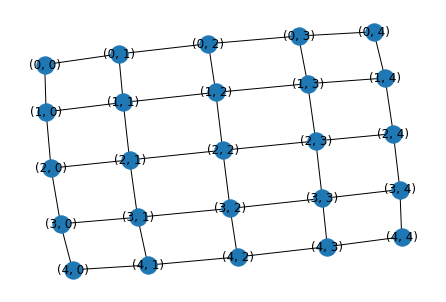

In [ ]:
# Load the nx graph & draw
grid_nx_g = nx.grid_2d_graph(5, 5)
nx.draw(grid_nx_g, with_labels=True)

# Define edge defintions for the ArangoDB graph to understand
grid_edge_definitionsa = [
    {
        "edge_collection": "to",
        "from_vertex_collections": ["Node"],
        "to_vertex_collections": ["Node"],
    }
]

# Introduce the new adapter class
class Basic_Grid_ArangoDB_Networkx_Adapter(ArangoDB_Networkx_Adapter):
    def _identify_nx_node(self, id, node: dict, overwrite: bool) -> str:
        """
        Identify (based on id or node data) what ArangoDB collection this node belongs to.

        If you plan on doing NetworkX -> ArangoDB, you must override this function
        (unless your nx graph already complies to ArangoDB standards).
        """
        return "Node"  # Only one node collection in this dataset

    def _identify_nx_edge(self, from_node, to_node, e: dict, overwrite: bool) -> str:
        """
        Identify (based on from, to, or edge data) what ArangoDB collection this edge belongs to.

        If you plan on doing NetworkX -> ArangoDB, you must override this function
        (unless your nx graph already complies to ArangoDB standards).
        """
        from_collection = self.adb_node_map.get(from_node)["collection"]
        to_collection = self.adb_node_map.get(to_node)["collection"]
        if from_collection == to_collection == "Node":
            return "to"

        return "Unknown_Edge" # (This won't happen here, but it's important to know)
    
    def _keyify_nx_node(self, id, node, col, overwrite: bool) -> str:
        """
        Create a key based off of the node id that ArangoDB will not complain about.

        If you plan on doing NetworkX -> ArangoDB, you must override this function
        (unless your nx graph already complies to ArangoDB standards).
        """
        # Since our NetworkX nodes have an id of type tuple, we can use the existing helper function.
        return self._tuple_to_arangodb_key_helper(id)


# Instantiate the adapter
grid_adbnx_adapter = Basic_Grid_ArangoDB_Networkx_Adapter(con)

# Create the ArangoDB graph
name = "Grid"
grid_adb_g = grid_adbnx_adapter.create_arangodb_graph(name, grid_nx_g, grid_edge_definitions) #, overwrite=True)


print(f"Inspect the graph here: https://tutorials.arangodb.cloud:8529/_db/{con['dbName']}/_admin/aardvark/index.html#graph/{name}")
print(f"(View the original graph here: https://networkx.org/documentation/stable/auto_examples/basic/plot_read_write.html#sphx-glr-auto-examples-basic-plot-read-write-py)")

## Example 2: NetworkX Football Graph

ArangoDB: Football created
Inspect the graph here: https://tutorials.arangodb.cloud:8529/_db/TUT1qx8lj2wdockelqg6j89ol/_admin/aardvark/index.html#graph/Football


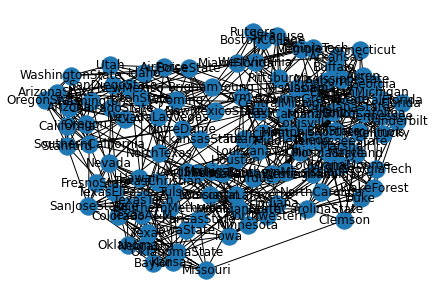

In [ ]:
import io
import zipfile
import urllib.request as urllib

# Load the nx graph & draw
url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"
sock = urllib.urlopen(url)
s = io.BytesIO(sock.read())
sock.close()
zf = zipfile.ZipFile(s)
gml = zf.read("football.gml").decode()
gml = gml.split("\n")[1:]

football_nx_g = nx.parse_gml(gml)
nx.draw(football_nx_g, with_labels=True)

# Define edge defintions for the ArangoDB graph to understand
football_edge_definitions = [
    {
        "edge_collection": "Played",
        "from_vertex_collections": ["Team"],
        "to_vertex_collections": ["Team"],
    }
]

# Introduce the new adapter class
class Football_ArangoDB_Networkx_Adapter(ArangoDB_Networkx_Adapter):
    def _identify_nx_node(self, id: str, node: dict, overwrite: bool) -> str:
        return "Team"  # Only one node collection in this dataset

    def _identify_nx_edge(self, from_node, to_node, e: dict, overwrite: bool) -> str:
        from_collection = self.adb_node_map.get(from_node)["collection"]
        to_collection = self.adb_node_map.get(to_node)["collection"]
        if from_collection == to_collection == "Team":
            return "Played"

        return "Unknown_Edge"

    def _keyify_nx_node(self, id, node, collection, overwrite: bool) -> str:
        # Since our NetworkX nodes have an id of type string, we can use the existing helper function.
        return self._string_to_arangodb_key_helper(id)


# Instantiate the adapter
football_adbnx_adapter = Football_ArangoDB_Networkx_Adapter(con)

# Create the ArangoDB graph
name = "Football"
football_adb_g = football_adbnx_adapter.create_arangodb_graph(name, football_nx_g, football_edge_definitions) #, overwrite=True)


print(f"Inspect the graph here: https://tutorials.arangodb.cloud:8529/_db/{con['dbName']}/_admin/aardvark/index.html#graph/{name}")
print(f"(View the original graph here: https://networkx.org/documentation/stable/auto_examples/graph/plot_football.html#sphx-glr-auto-examples-graph-plot-football-py)")

# Full Cycles

## From ArangoDB (ArangoDB to NetworkX to ArangoDB)

NetworkX: fraud-detection created
ArangoDB: fraud-detection-nx created
Inspect the new graph here: https://tutorials.arangodb.cloud:8529/_db/TUT1qx8lj2wdockelqg6j89ol/_admin/aardvark/index.html#graph/fraud-detection-nx
(View the original graph here: https://tutorials.arangodb.cloud:8529/_db/TUT1qx8lj2wdockelqg6j89ol/_admin/aardvark/index.html#graph/fraud-detection


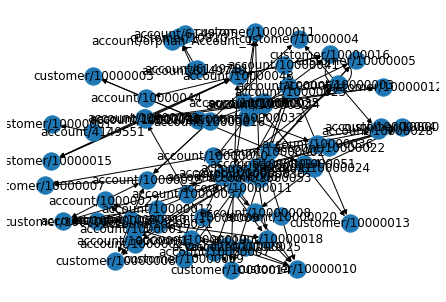

In [ ]:
name = "fraud-detection"

# Start from ArangoDB graph
original_fraud_adb_g = adbnx_adapter.db.graph(name) 

# Create NetworkX graph from ArangoDB graph
fraud_nx_g = adbnx_adapter.create_networkx_graph_from_arangodb_graph(name)
nx.draw(fraud_nx_g, with_labels=True)

# Provide edge_definitions (we are preparing to re-translate back to ArangoDB)
edge_definitions = [
    {
        "edge_collection": "accountHolder_nx",
        "from_vertex_collections": ["customer_nx"],
        "to_vertex_collections": ["account_nx"],
    },
    {
        "edge_collection": "transaction_nx",
        "from_vertex_collections": ["account_nx"],
        "to_vertex_collections": ["account_nx"],
    },
]

# Create ArangoDB graph from NetworkX graph
new_name = name + "-nx"
# Keify edges to keep the same key values as original (this is optional)
new_fraud_adb_g = adbnx_adapter.create_arangodb_graph(new_name, fraud_nx_g, edge_definitions, keyify_edges=True) #, overwrite=True)

print(f"Inspect the new graph here: https://tutorials.arangodb.cloud:8529/_db/{con['dbName']}/_admin/aardvark/index.html#graph/{new_name}")
print(f"(View the original graph here: https://tutorials.arangodb.cloud:8529/_db/{con['dbName']}/_admin/aardvark/index.html#graph/{name}")


## From ArangoDB (ArangoDB to NetworkX to ArangoDB) with overwrite

NetworkX: fraud-detection created
ArangoDB: fraud-detection created
Inspect the overwritten graph here: https://tutorials.arangodb.cloud:8529/_db/TUT1qx8lj2wdockelqg6j89ol/_admin/aardvark/index.html#graph/fraud-detection


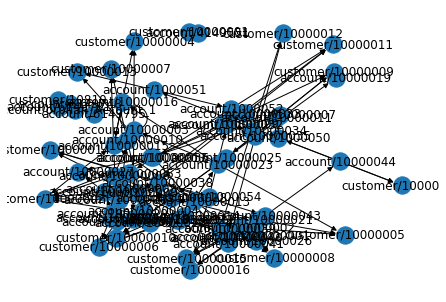

In [ ]:
name = "fraud-detection"

# Start from ArangoDB graph
original_fraud_adb_g = adbnx_adapter.db.graph(name) 

# Create NetworkX graph from ArangoDB graph
fraud_nx_g = adbnx_adapter.create_networkx_graph_from_arangodb_graph(name)
nx.draw(fraud_nx_g, with_labels=True)

# Modify the NetworkX graph
for _, node in fraud_nx_g.nodes(data=True):
    node["new_vertex_data"] = ["new", "vertex", "data", "here"]

for _, _, edge in fraud_nx_g.edges(data=True):
    edge["new_edge_data"] = ["new", "edge", "data", "here"]

# Provide edge_definitions (we are preparing to re-translate back to ArangoDB)
# Notice that we have removed the "_nx" suffix, because we want to overwrite.
edge_definitions = [
    {
        "edge_collection": "accountHolder",
        "from_vertex_collections": ["customer"],
        "to_vertex_collections": ["account"],
    },
    {
        "edge_collection": "transaction",
        "from_vertex_collections": ["account"],
        "to_vertex_collections": ["account"],
    },
]

# Create ArangoDB graph from NetworkX graph
# Keify edges to keep the same key values as original (this is optional)
new_fraud_adb_g = adbnx_adapter.create_arangodb_graph(name, fraud_nx_g, edge_definitions, keyify_edges=True, overwrite=True)

print(f"Inspect the overwritten graph here: https://tutorials.arangodb.cloud:8529/_db/{con['dbName']}/_admin/aardvark/index.html#graph/{name}")

## From NetworkX (NetworkX to ArangoDB to NetworkX)

[((0, 0), {}), ((0, 1), {}), ((0, 2), {}), ((0, 3), {}), ((0, 4), {}), ((1, 0), {}), ((1, 1), {}), ((1, 2), {}), ((1, 3), {}), ((1, 4), {}), ((2, 0), {}), ((2, 1), {}), ((2, 2), {}), ((2, 3), {}), ((2, 4), {}), ((3, 0), {}), ((3, 1), {}), ((3, 2), {}), ((3, 3), {}), ((3, 4), {}), ((4, 0), {}), ((4, 1), {}), ((4, 2), {}), ((4, 3), {}), ((4, 4), {})]
[((0, 0), (1, 0), {}), ((0, 0), (0, 1), {}), ((0, 1), (1, 1), {}), ((0, 1), (0, 2), {}), ((0, 2), (1, 2), {}), ((0, 2), (0, 3), {}), ((0, 3), (1, 3), {}), ((0, 3), (0, 4), {}), ((0, 4), (1, 4), {}), ((1, 0), (2, 0), {}), ((1, 0), (1, 1), {}), ((1, 1), (2, 1), {}), ((1, 1), (1, 2), {}), ((1, 2), (2, 2), {}), ((1, 2), (1, 3), {}), ((1, 3), (2, 3), {}), ((1, 3), (1, 4), {}), ((1, 4), (2, 4), {}), ((2, 0), (3, 0), {}), ((2, 0), (2, 1), {}), ((2, 1), (3, 1), {}), ((2, 1), (2, 2), {}), ((2, 2), (3, 2), {}), ((2, 2), (2, 3), {}), ((2, 3), (3, 3), {}), ((2, 3), (2, 4), {}), ((2, 4), (3, 4), {}), ((3, 0), (4, 0), {}), ((3, 0), (3, 1), {}), ((3, 1), (

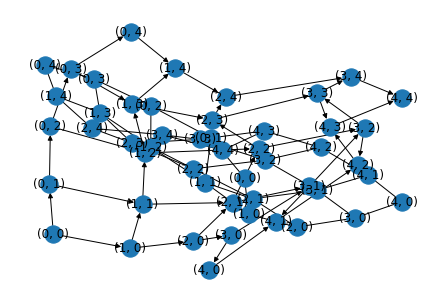

In [ ]:
# Load the nx graph & draw
original_grid_nx_g = nx.grid_2d_graph(5, 5)
nx.draw(original_grid_nx_g, with_labels=True)
print(original_grid_nx_g.nodes(data=True))
print(original_grid_nx_g.edges(data=True))

# Re-introduce the Grid adapter class
class Basic_Grid_ArangoDB_Networkx_Adapter(ArangoDB_Networkx_Adapter):
    def _identify_nx_node(self, id, node: dict, overwrite: bool) -> str:
        return "Node"  # Only one node collection in this dataset

    def _keyify_nx_node(self, id, node, col, overwrite: bool) -> str:
        return self._tuple_to_arangodb_key_helper(id)

    def _identify_nx_edge(self, from_node, to_node, e: dict, overwrite: bool) -> str:
        from_collection = self.adb_node_map.get(from_node)["collection"]
        to_collection = self.adb_node_map.get(to_node)["collection"]
        if from_collection == to_collection == "Node":
            return "to"

        return "Unknown_Edge"

    # We've added this new method to maintain our original NetworkX node IDs
    def _prepare_nx_node(self, node: dict, col: str, atribs: set):
        nx_id = tuple(
            int(n)
            for n in tuple(
                node["_key"],
            )
        )
        return nx_id

# Re-instantiate the Grid adapter class
grid_adbnx_adapter = Basic_Grid_ArangoDB_Networkx_Adapter(con)

# Delete the Grid graph if it already exists in ArangoDB
name = "Grid"
if grid_adbnx_adapter.db.has_graph(name):
    grid_adbnx_adapter.db.delete_graph(name, drop_collections=True)

# Define edge defintions for the ArangoDB graph to understand
grid_edge_definitions = [
    {
        "edge_collection": "to",
        "from_vertex_collections": ["Node"],
        "to_vertex_collections": ["Node"],
    }
]

# Create the ArangoDB graph
grid_adbnx_adapter.create_arangodb_graph(name, original_grid_nx_g, grid_edge_definitions)

# Create the NetworkX graph from the ArangoDB graph
new_grid_nx_g = grid_adbnx_adapter.create_networkx_graph_from_arangodb_graph(name)
# Draw the new graph
nx.draw(new_grid_nx_g, with_labels=True)
print(new_grid_nx_g.nodes(data=True))
print(new_grid_nx_g.edges(data=True))

# Next Steps

* Explore [Interactive NetworkX Notebook](https://colab.research.google.com/github/joerg84/Graph_Powered_ML_Workshop/blob/master/NetworkX.ipynb)
* Explore [ArangoDB](https://www.arangodb.com/)
* Explore [Interactive ArangoDB tutorials](https://github.com/joerg84/ArangoDBUniversity#arangodb-university)